<a href="https://colab.research.google.com/github/mounishsjsu/266_Project/blob/master/266_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=163aefcf51a66ed6dbc4d60fdb3dd22ac86f060958f74b56daa67edd5f66de36
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession,SQLContext
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd
import plotly.graph_objects as go
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from pyspark.sql.types import IntegerType
import seaborn as sns
import re
from textblob import TextBlob

In [3]:
conf = SparkConf().setMaster("local").setAppName("Weather analysis")
from sklearn.metrics import mean_squared_error      #for reading & storing data, pre-processing
pd.set_option('display.float_format', lambda x: '%.5f' % x)

sc = SparkContext(conf = conf)
spark = SparkSession(sc)

sqlContext = SQLContext(sc)

In [4]:
df = spark.read.option("header",'true').csv("/content/city_temperature.csv",inferSchema=True)

In [5]:
print(df.head(3))

[Row(Region='Africa', Country='Algeria', State=None, City='Algiers', Month=1, Day=1, Year=1995, AvgTemperature=64.2), Row(Region='Africa', Country='Algeria', State=None, City='Algiers', Month=1, Day=2, Year=1995, AvgTemperature=49.4), Row(Region='Africa', Country='Algeria', State=None, City='Algiers', Month=1, Day=3, Year=1995, AvgTemperature=48.8)]


In [6]:
print(df.dtypes)

#Convert the data into a pandas dataframe
df=df.toPandas()

#Choosing only the rows with India from the dataframe
data_India  = df[ (df['Country'] == 'India') & (df['Year'] < 2020)]

[('Region', 'string'), ('Country', 'string'), ('State', 'string'), ('City', 'string'), ('Month', 'int'), ('Day', 'int'), ('Year', 'int'), ('AvgTemperature', 'double')]


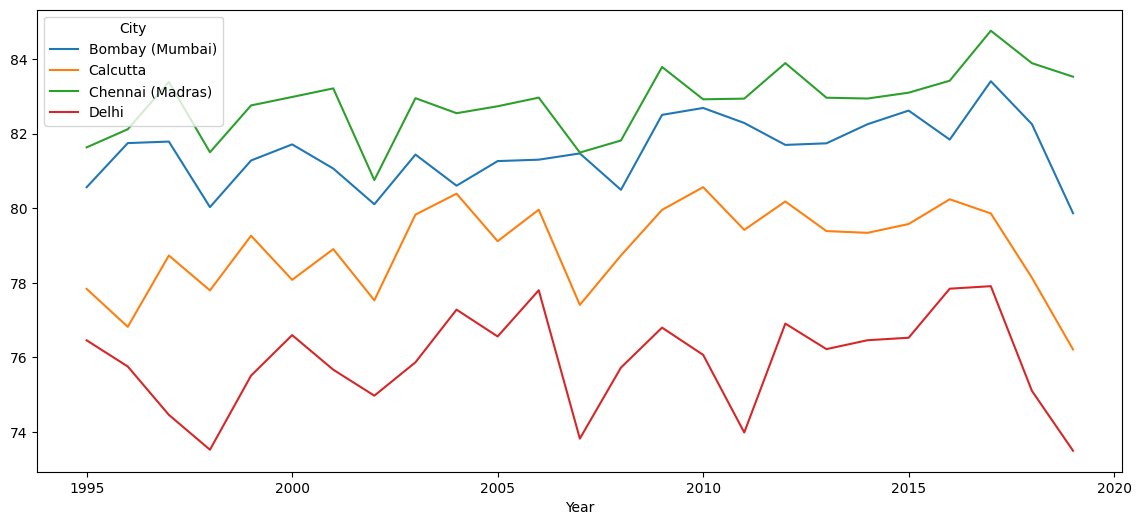

In [12]:
India_plot=data_India.groupby(['City','Year'])['AvgTemperature'].mean().reset_index()
India_pivot = India_plot.pivot(index='Year', columns='City', values='AvgTemperature').plot()
plt.gcf().set_size_inches(14,6)
fig1= plt.savefig("/content/Screenshots")
plt.show()

In [9]:
def season(df):
    if df in [12,1,2] :
        return 'Winter'
    elif  df in [3,4,5]:
        return 'Summer'
    elif df in [6,7,8]:
        return 'Monsoon'
    elif df in [9,10,11]:
        return 'Autumn'
    else:
        return 'NA'


In [10]:
pd.options.mode.chained_assignment = None  # default='warn'
data_India['Season'] = data_India['Month'].apply(season)

data_India['AvgTemperature']=data_India['AvgTemperature'].astype('float64')
data_India[['Month' , 'Day' , 'Year']]=data_India[['Month' , 'Day' , 'Year']].astype('int64')

#Seasons in Delhi
data_Delhi = data_India[data_India['City'] == 'Delhi']

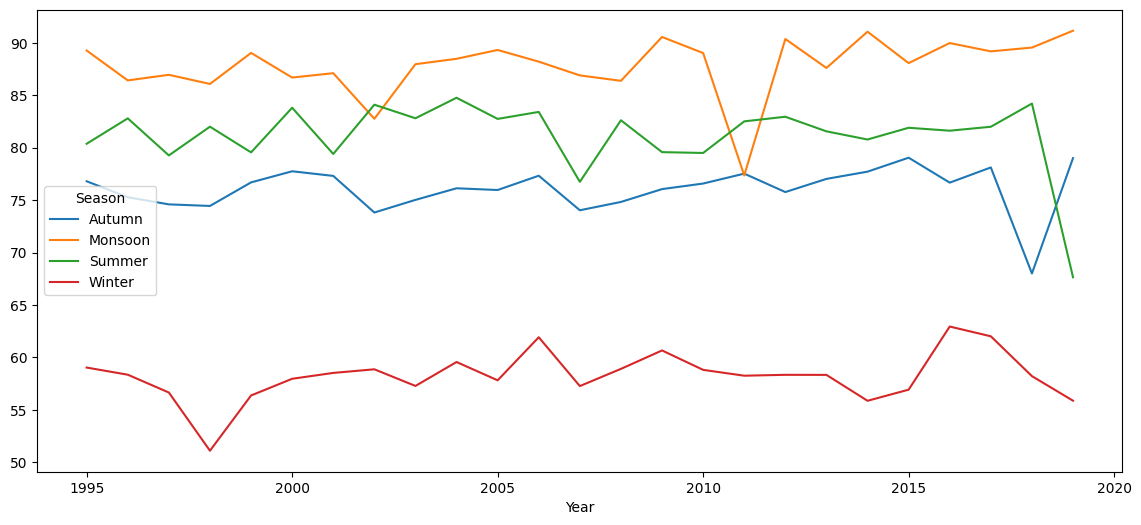

In [14]:
Delhi_plot=data_Delhi.groupby(['Season','Year'])['AvgTemperature'].mean().reset_index()
Delhi_plot.pivot(index='Year', columns='Season', values='AvgTemperature').plot()
plt.gcf().set_size_inches(14,6)
fig2= plt.savefig("/content/Screenshots")
plt.show()